**This is the code for the machine learning model**

In order to use this code, your data must be saved as **"TotalTrafo.csv"** in the same folder as this code

In [1]:
#import neccessary tools and the csv file "Housing"
import matplotlib.pyplot as plt
from sklearn import datasets
import pandas as pd
import numpy as np
%matplotlib inline
data = pd.read_csv("TotalTrafo.csv")

In [2]:
#Look at the data and shape it, so the right format is used and it can be seperated
dir(data)
type(data.Trafo1)

pandas.core.series.Series

In [3]:
# Seperate the data in the target values (Energy usage of Trafo1 and Trafo2) and the features, check if everything is correct
Y = data['Trafo1']
X = data.drop(['Trafo1', 'Trafo2', 'datetime', 'Trafo_Total', 'Month', 'Day'],axis=1)

#check the format and the shape of the data again
print(X)
#print(Y)

      Hour  Workday  Min_Temp  Max_Temp  Feels_Like  Pressure  Humidity  \
0        0        1     -4.70       2.2       -5.23      1012        97   
1        1        1     -5.20       2.7       -4.92      1012        94   
2        2        1     -5.70       2.0       -5.48      1012        92   
3        3        1     -5.00       1.7       -5.10      1012        93   
4        4        1     -4.64       0.0       -5.64      1012        93   
...    ...      ...       ...       ...         ...       ...       ...   
8755    19        1     -2.30       8.4       -1.54      1016        41   
8756    20        1     -3.00       7.8       -3.70      1017        48   
8757    21        1     -2.20       7.1       -0.42      1018        60   
8758    22        1     -2.30       6.9       -1.94      1019        53   
8759    23        1     -2.50       6.9       -2.17      1020        53   

      Wind Speed  
0           1.18  
1           1.00  
2           1.00  
3           0.52  
4   

In [4]:
data.Trafo1.shape

(8760,)

In [5]:
data['Trafo1']

0       29.31
1       29.06
2       30.40
3       30.02
4       30.91
        ...  
8755    49.54
8756    42.37
8757    40.58
8758    38.14
8759    29.18
Name: Trafo1, Length: 8760, dtype: float64

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 65)

In [8]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

In [9]:
lr.fit(X_train, Y_train, sample_weight = None)

LinearRegression()

In [10]:
predictions = lr.predict(X_test)
len(predictions)

1752

In [11]:
print(X_test)

      Hour  Workday  Min_Temp  Max_Temp  Feels_Like  Pressure  Humidity  \
5835     3        0      0.00       5.5       -0.86      1018        89   
5823    15        1     -0.10       6.2        0.17      1023        77   
7382    14        0     -2.22       4.5       -1.75       997        79   
8388    12        0      5.30      18.0        8.14      1009        39   
4407    15        1      5.00      13.6        5.50      1036        40   
...    ...      ...       ...       ...         ...       ...       ...   
6024     0        0     -4.00      -0.4       -4.92      1021        91   
1863    15        1     22.50      30.5       26.60      1008        49   
6936     0        1     -5.40       2.5       -7.60      1006        74   
5478     6        1      2.70      10.4        4.86      1020        90   
2713     1        1     11.20      16.0       13.01      1013       100   

      Wind Speed  
5835        2.48  
5823        2.00  
7382        1.00  
8388        3.00  
4407

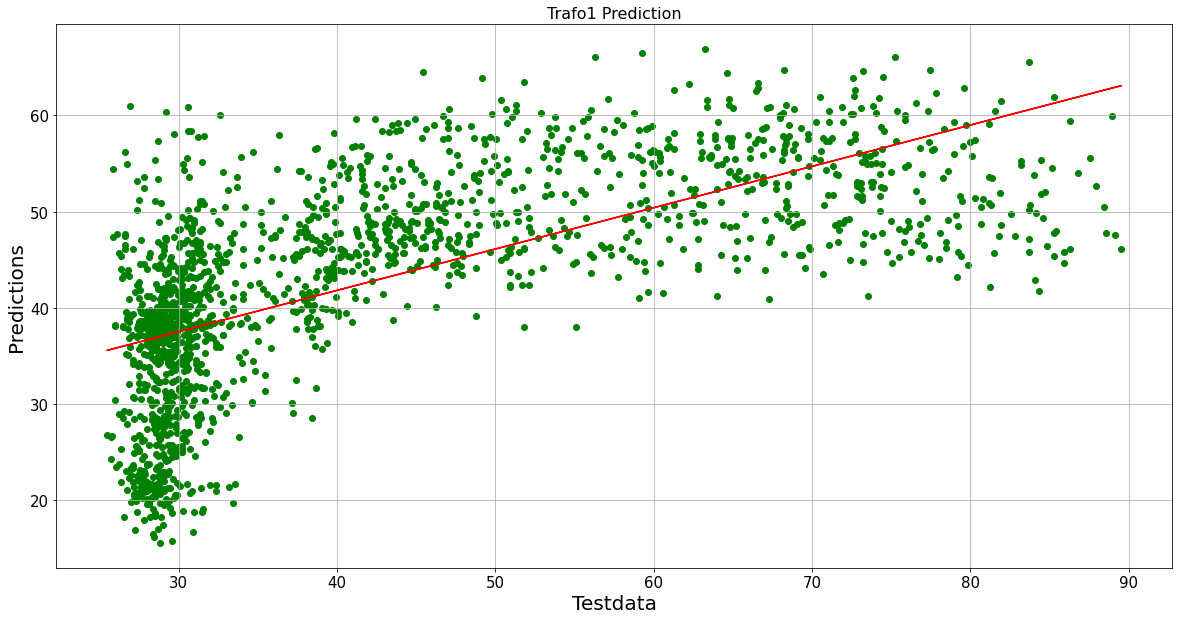

In [26]:
plt.figure(figsize=(20,10))
plt.rc('xtick', labelsize=15) 
plt.rc('ytick', labelsize=15)
plt.scatter(Y_test, predictions, color='green')
plt.title('Trafo1 Prediction', fontname='sans-serif', fontsize=16)
plt.xlabel("Testdata", fontsize=20)
plt.ylabel("Predictions", fontsize=20)
plt.grid(True)

#add a linear polynomial fit line to the plot
from numpy.polynomial.polynomial import polyfit
b, m = polyfit(Y_test, predictions, 1)
plt.plot(Y_test, b + m * Y_test, '-r')

In [116]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
MAE1 = r2_score(Y_test, predictions)
RMSE1 = np.sqrt(mean_squared_error(Y_test, predictions))
RMSE1 = round(RMSE1, 2)

In [117]:
txt1 = "The MAE is {MAE1}".format(MAE1 = MAE1)
txt2 = "With this model we can predict the energy consumption of Trafo 1 on a specific day within the range of \033[1m {RMSE1} kW".format(RMSE1 = RMSE1)

print(txt1)
print(txt2)

The MAE is 0.43731610258531584
With this model we can predict the energy consumption of Trafo 1 on a specific day within the range of  12.61 kW
